In [1]:
# make jupyter happy
import sys
sys.path.append('..')

In [2]:
from models.detectors import create_detector
import torch
import torchvision
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# download pretrained mmdetection model from model zoo
torch.utils.model_zoo.load_url(
    'https://s3.ap-northeast-2.amazonaws.com/open-mmlab/mmdetection/models/retinanet_r101_fpn_1x_20181129-f016f384.pth',
    model_dir='.');

In [4]:
# create RetinaNet with ResNet 101 backbone, and pretrained COCO weights
# Note: COCO has 80 classes plus one background class
retina = create_detector('retinanet_r101_fpn', number_of_classes=81, pretrained='retinanet_r101_fpn_1x_20181129-f016f384.pth')


In [5]:
with torch.no_grad():
    result = retina.detect('demo.jpg')

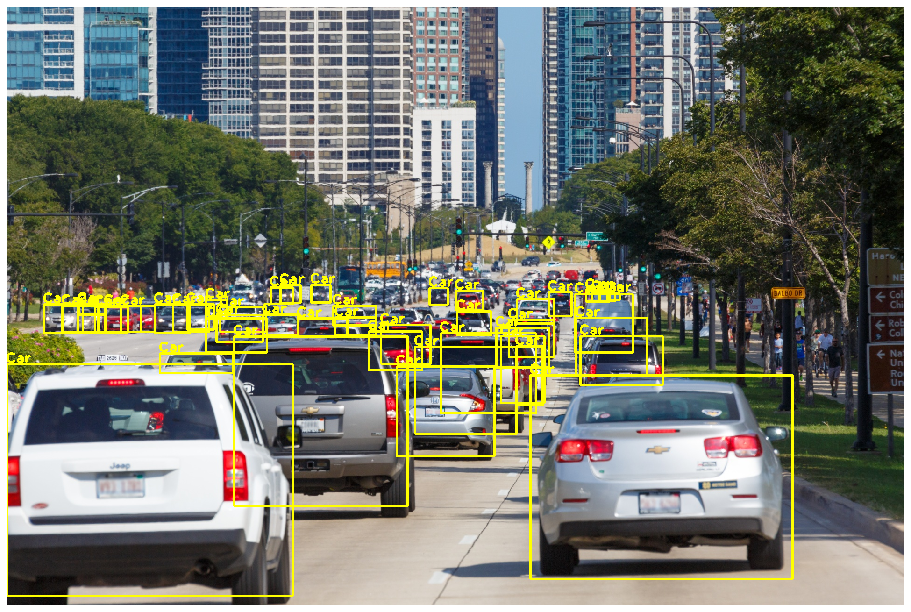

In [6]:
res = []

# Look for cars in COCO dataset, with threshold 0.3
for r in result[2]:
    if r[-1] >= .3:
        res.append(r[:-1].astype(dtype=np.int).tolist())

if len(res) > 0:
    im = cv2.imread('demo.jpg')
    for r in res:
        cv2.rectangle(im, (r[0], r[1]), (r[2], r[3]), (0, 255, 255), 3)
        cv2.putText(im, "Car", (r[0]-3, r[1]-3), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 255), 3)

im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(20,11))
plt.axis("off")
plt.imshow(im)